<a href="https://colab.research.google.com/github/Hasanen99/ML-Homeworks-AIDOJO/blob/main/Assignment_5_Hasanen_A_Sahib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 05: Deep Learning

This Week's assignment is to train Deep Learning models on the `cats and dogs` images dataset to accurately classify the animal in the image.

Before starting copy this file and work on your own copy by following the below steps: <br>
`File > Save Copy in Drive`. Then add your name to the file (e.g., Assignment 05: Deep Learning - Muntadher Alkaabi).


**Submission Deadline: Thursday, 2/17/2022 at 3:00 PM**

**Requirements:**

1. Import all necessary libraries for the Deep Learning project.
2. Download the dataset (the link is provided below).
3. Make sure to convert the target into one hot vector.
4. Create data pipeline with data augmentation.
    1. Read images using tensorflow.
    2. Make sure the pixels values are scaled between (`0-1`).
    3. Resize the images to (224,224).
    4. Apply multiple image augmentation on the data.
    5. Make sure the augmentation image pixels are scaled between (`0-1`). 
5. Plot the images.
6. Train CNN models (try ResNet architecture).
**Note:** use sub-class to create the ResNet model.


7. Use multiple Transfer Learning models.<br>
**Note:** make sure to chooses the right model with input shape (224,224,3).

8. Use the right evaluation metrics to choose the best model (write down your choice of the best model).


**Note:** To get the best performance from the model, manually tune the hyperparameters of each model. 

Find relevant links below:<br>
[Dataset](https://www.kaggle.com/aseemdandgaval/23-pet-breeds-image-classification)

[Submission Form](https://forms.gle/GGELZHoiB5pBtFXi9)<br>
[How to use kaggle with colab](https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/)

Good luck and feel free to ask any questions in the or on the Questions channel.

# 1- Import all necessary libraries for the Deep Learning project

In [ ]:
# import the necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import model_selection, metrics
import os
import glob
import tqdm
import cv2


# 2- Download the dataset

In [ ]:
# download the required dataset from kaggle 
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d aseemdandgaval/23-pet-breeds-image-classification

mkdir: cannot create directory ‘/root/.kaggle’: File exists
23-pet-breeds-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip /content/23-pet-breeds-image-classification.zip

In [ ]:
Classes=os.listdir('/content/Pet_Breeds')
Num_of_classes=len(Classes)
AP_lis=[]
for c in Classes:
  P_lists=glob.glob('/content/Pet_Breeds/'+c+'/*')
  V_lis=[P_lists[i].split('.')[1] for i in range(len(P_lists))]
  AP_lis.extend(V_lis)

Size=len(AP_lis)
images_extentions=set(AP_lis)
print(f'Number of classes in data set: {Num_of_classes}\nClasses: {Classes}\nextentions of images in the data: {images_extentions}\nSize of data: {Size} image')

Number of classes in data set: 23
Classes: ['dachshund', 'abyssinian', 'labrador', 'shiba inu', 'husky', 'rottwiler', 'sphynx', 'siamese cat', 'persian cat', 'american shorthair', 'pug', 'corgi', 'mumbai cat', 'maine coon', 'ragdoll cat', 'german shepherd', 'golden retriever', 'boxer', 'pomeranian', 'yorkshire terrier', 'bulldog', 'beagle', 'chihuahua']
extentions of images in the data: {'jpg', 'JPG', 'jpeg'}
Size of data: 3881 image


  Function returns dataframe from specific folder with the required files extention


In [ ]:
def create_dataframe(folder_path,file_extension):
  """
  Function returns dataframe from specific folder with the required files extention
  """
  labels= [] 
  images_path = []

  folders = os.listdir(folder_path)
  for label in range(len(folders)):
    for image_path in glob.glob(folder_path+'/'+folders[label]+'/*.'+file_extension):

      images_path.append(image_path)
      labels.append(label)
  df =pd.DataFrame({'paths':images_path, 'labels':labels})
  return df

Collect data of all images extentions, as one DataFrame

In [ ]:
Data=pd.DataFrame()
for extention in images_extentions:
  bbn=create_dataframe('/content/Pet_Breeds',extention)
  Data=pd.concat([Data,bbn])
Data

,paths,labels
0,/content/Pet_Breeds/dachshund/dachshund_87.jpg,0
1,/content/Pet_Breeds/dachshund/dachshund_150.jpg,0
2,/content/Pet_Breeds/dachshund/dachshund_122.jpg,0
3,/content/Pet_Breeds/dachshund/dachshund_72.jpg,0
4,/content/Pet_Breeds/dachshund/dachshund_169.jpg,0
...,...,...
111,/content/Pet_Breeds/beagle/beagle_110.jpeg,21
112,/content/Pet_Breeds/beagle/beagle_48.jpeg,21
113,/content/Pet_Breeds/beagle/beagle_59.jpeg,21
114,/content/Pet_Breeds/chihuahua/chihuahua_92.jpeg,22


Train Test splitting

In [ ]:
x_train,x_test,y_train , y_test = model_selection.train_test_split(Data.paths,Data.labels ,test_size = 0.2, stratify=Data.labels)

In [ ]:
def spliti(v):
  return v.split('.')[1]

mas=pd.DataFrame(x_train)
# mas[mas['paths']=='/content/Pet_Breeds/siamese cat/siamese cat_22.jpg']
mas['paths']=mas['paths'].apply(spliti)
mas[mas['paths']=='jpg'].shape

(2980, 1)

Shape checking

In [ ]:
# check the shape of the following (x_train, y_train and x_test, y_test)
print(f'shape of Train X: {x_train.shape}\nshape of Train Y: {y_train.shape}\nshape of Test X: {x_test.shape}\nshape of Test Y: {y_test.shape}\n')

shape of Train X: (3104,)
shape of Train Y: (3104,)
shape of Test X: (777,)
shape of Test Y: (777,)



# 3- Make sure to convert the target into one hot vector

In [ ]:
# convert the labels to one hot vector
y_train_hot=tf.one_hot(y_train,depth=len(set(y_train)))
y_test_hot=tf.one_hot(y_test,depth=len(set(y_train)))
print(y_train_hot[0],"\n\n\n",y_train)

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(23,), dtype=float32) 


 2193    13
1499     9
1674    10
2730    16
2977    18
        ..
307      1
3377    20
246      1
1577     9
1126     6
Name: labels, Length: 3104, dtype: int64


In [ ]:
print(tf.__version__)

2.8.0


# 4- Create Data Pipeline with Data Augmentation


In [ ]:
# read images file from file path
def read_image(x,y):
  x= tf.io.read_file(x)
  x= tf.image.decode_image(x,channels=3)
  
  x = tf.image.convert_image_dtype(x, tf.float32)
  x= tf.image.resize(x, (224,224))
  return x,y

def image_aug(x,y):
  x = tf.image.random_flip_left_right(x)
  x= tf.image.random_flip_up_down(x)
  x = tf.image.random_brightness(x,max_delta=32/255)
  x= tf.image.random_saturation(x,lower=0.5,upper=1.5)
  x = tf.clip_by_value(x,0.0,1.0)
  return x,y

In [ ]:
error_path=[]
for i in tqdm.tqdm(range(len(Data.paths))):
  try :
    read_image(Data.paths[i],0)
  except : 
    error_path.append(i)


100%|██████████| 3881/3881 [01:05<00:00, 59.69it/s]


In [ ]:
error_path

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 181,
 893,
 1175,
 2451,
 3423,
 3712,
 3713,
 3714,
 3715,
 3716,
 3717,
 3718,
 3719,
 3720,
 3721,
 3722,
 3723,
 3724,
 3725,
 3726,
 3727,
 3728,
 3729,
 3730,
 3731,
 3732,
 3733,
 3734,
 3735,
 3736,
 3737,
 3738,
 3739,
 3740,
 3741,
 3742,
 3743,
 3744,
 3745,
 3746,
 3747,
 3748,
 3749,
 3750,
 3751,
 3752,
 3753,
 3754,
 3755,
 3756,
 3757,
 3758,
 3759,
 3760,
 3761,
 3762,
 3763,
 3764,
 3765,
 37

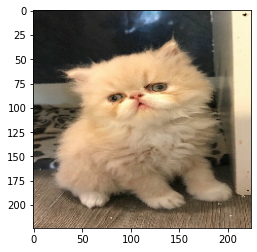

In [ ]:
plt.imshow(read_image('/content/Pet_Breeds/persian cat/persian cat_136.JPG',1)[0])

In [ ]:
data = tf.data.Dataset.from_tensor_slices((x_train,y_train))
data =data.map(read_image, num_parallel_calls=tf.data.AUTOTUNE)
data

In [ ]:
# create the data pipline 
def dataset_creater(x,y, training = True):
    data = tf.data.Dataset.from_tensor_slices((x,y))
    data =data.shuffle(2048)
    # data =data.map(read_image, num_parallel_calls=tf.data.AUTOTUNE)
    data=data.apply(read_image)
    if training : #to make data augmentation just for taraining data
        data =data.map(image_aug,num_parallel_calls=tf.data.AUTOTUNE)

    data = data.batch(32)
    data = data.prefetch(tf.data.AUTOTUNE)
    return data 

In [ ]:
train_dataset = dataset_creater(x_train, y_train)
test_dataset = dataset_creater(x_test,y_test, training = False)

TypeError: ignored

In [ ]:
for x,y in test_dataset.take(1):
  print(y.shape)
  print(x.shape)
  # plt.imshow(x)

(32,)
(32, 224, 224, 3)


# 5- Plot the images 

In [ ]:
# plot the augmented images 



# 6- Modeling
**Note:**
1. Train CNN models (try ResNet architecture).
1. Make sure to separate each model in a new sub-section.
2. Use multiple Transfer Learning models.
4. Use the right evaluation metrics to choose the best model (write down your choice of the best model).

## CNN Model
### Resnet Blocks 
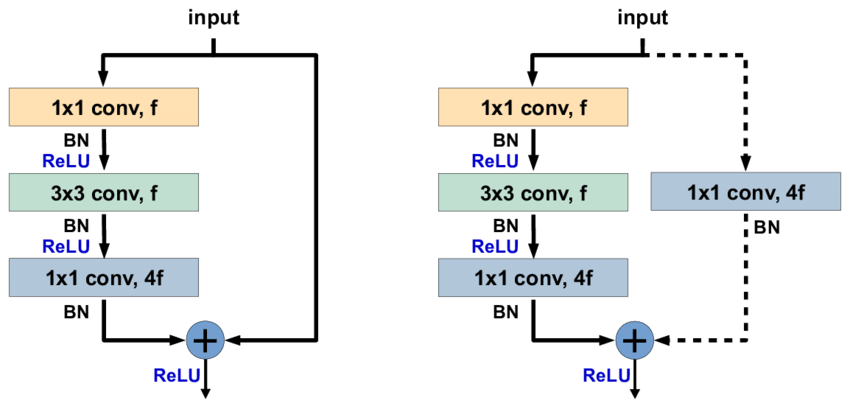

In [ ]:
# create the ResNet blocks 

# create the identity block 



# create the convolution block 


In [ ]:
# using sub-class 
# build the model


### Model evaluation

In [ ]:
# evaluate the model

